In [19]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

from FRespuestastyfdefiltrosFIReIIR import FIRrespt, FIRrespf, IIRrespt, IIRrespf

import scipy.signal as ss

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.10.06.png">

### Apartado "A"

Sería un filtro no recursivo porque no utiliza valores anteriores de y.

### Apartado "B"

Considerando x(n) = e ** (jwn)

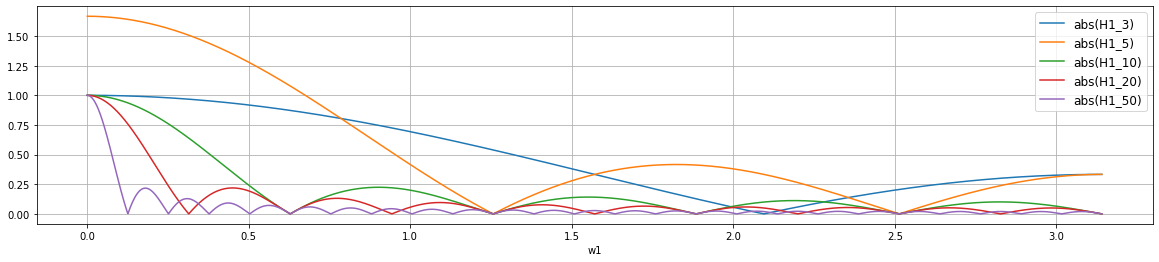

In [24]:
w1 = np.arange (0,np.pi,0.001)
#Filtro de Orden 3
H1_3 = (1/3) * (np.exp(-w1*0j) + np.exp(-w1*1j) + np.exp(-w1*2j))
#Filtro de Orden 5
H1_5 = (1/3) * (np.exp(-w1*0j) + np.exp(-w1*1j) + np.exp(-w1*2j) + np.exp(-w1*3j) + np.exp(-w1*4j))
#Filtro de Orden 10
M10 = 10 
aux10 = []
for k in range (M10):
    aux10.append ( (1/M10) * np.exp(-w1*1j*k) )
H1_10 = np.sum (aux10,0)
#Filtro de Orden 20
M20 = 20 
aux20 = []
for k in range (M20):
    aux20.append ( (1/M20) * np.exp(-w1*1j*k) )
H1_20 = np.sum (aux20,0)
#Filtro de Orden 50
M50 = 50 
aux50 = []
for k in range (M50):
    aux50.append ( (1/M50) * np.exp(-w1*1j*k) )
H1_50 = np.sum (aux50,0)


plt.figure (figsize=(20,4))
plt.plot (w1,abs (H1_3),label="abs(H1_3)")
plt.plot (w1,abs (H1_5),label="abs(H1_5)")
plt.plot (w1,abs (H1_10),label="abs(H1_10)")
plt.plot (w1,abs (H1_20),label="abs(H1_20)")
plt.plot (w1,abs (H1_50),label="abs(H1_50)")
plt.xlabel ("w1")
plt.legend (fontsize = 12)
plt.grid (True)
plt.show ()

### En un filtro de promedios móviles, las frecuencias de corte será menor cuanto mayor sea el orden del filtro.

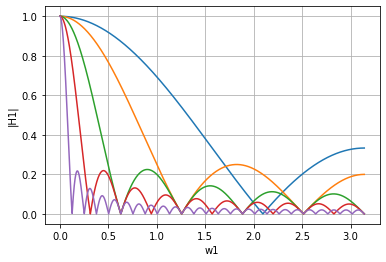

In [28]:
orden = np.array ([3,5,10,20,50])
H1 = [] #Ganancia del filtro

for index,M in enumerate (orden):
    aux1 = []
    for k in range (M):
        aux1.append ( (1/M) * np.exp(-w1*1j*k) )
    H1.append( np.sum (aux1,0) )
    plt.plot (w1,abs(H1[index]))

plt.xlabel ("w1")
plt.ylabel ("|H1|")
plt.grid (True)
plt.show ()

### Apartado "C"

In [29]:
umbral = 0.707
Wc = np.zeros (len(orden)) #contiene las frecuencias de corte

for m in range (len (orden)):
    value = np.where ( np.abs(H1[m]) < umbral )
    value = value [0] #Para quedarnos con el primer elemento
    Wc [m] = w1[value[0]]

print (f"La frecuencia de corte para el Filtro de Orden 3: {Wc[0]}")
print (f"La frecuencia de corte para el Filtro de Orden 5: {Wc[1]}")
print (f"La frecuencia de corte para el Filtro de Orden 10: {Wc[2]}")
print (f"La frecuencia de corte para el Filtro de Orden 20: {Wc[3]}")
print (f"La frecuencia de corte para el Filtro de Orden 50: {Wc[4]}")

La frecuencia de corte para el Filtro de Orden 3: 0.976
La frecuencia de corte para el Filtro de Orden 5: 0.5670000000000001
La frecuencia de corte para el Filtro de Orden 10: 0.28
La frecuencia de corte para el Filtro de Orden 20: 0.14
La frecuencia de corte para el Filtro de Orden 50: 0.056


<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.12.34.png">

### Apartado "A"

### Apartado "B"

/var/folders/42/1qzjx_y92x78ljc88vyh5hm80000gn/T/ipykernel_86325/2627629369.py:3: RuntimeWarning: invalid value encountered in true_divide
  ci = np.sin (0.5*ni) / (np.pi*ni)


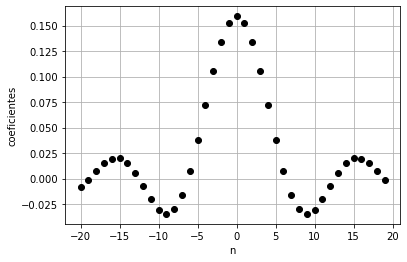

In [32]:
# i)
ni = np.arange (-20,20)
ci = np.sin (0.5*ni) / (np.pi*ni)
ci [20] = 0.5 / np.pi

plt.plot (ni,ci,"ok")
plt.xlabel ("n")
plt.ylabel ("coeficientes")
plt.grid (True)
plt.show ()

/var/folders/42/1qzjx_y92x78ljc88vyh5hm80000gn/T/ipykernel_86325/479765371.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  auxi [:,i] = ci[i] * np.exp (1j*ni[i]*wi)


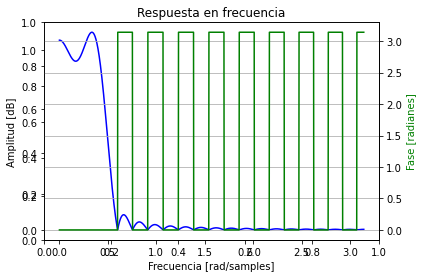

In [54]:
wi = np.arange (0,np.pi,0.001)
auxi = np.zeros (( len(wi),len(ni) ))

for i, k in enumerate (ni):
    auxi [:,i] = ci[i] * np.exp (1j*ni[i]*wi)


H2i = np.sum (auxi,1)
mod_H2i = np.abs (H2i)
pha_H2i = np.angle (H2i)


#Gráfico
fig = plt.figure ()
plt.title ("Respuesta en frecuencia")
ax1 = fig.add_subplot (111)

plt.plot (wi,mod_H2i,"b")
plt.ylabel ("Amplitud [dB]")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (wi,pha_H2i,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

/var/folders/42/1qzjx_y92x78ljc88vyh5hm80000gn/T/ipykernel_86325/3741779053.py:3: RuntimeWarning: invalid value encountered in true_divide
  cii = -np.sin (0.5*nii) / (np.pi*nii)


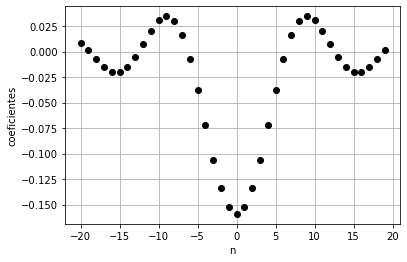

In [47]:
# ii) 
nii = np.arange (-20,20)
cii = -np.sin (0.5*nii) / (np.pi*nii)
cii [20] = -0.5 / np.pi

plt.plot (nii,cii,"ok")
plt.xlabel ("n")
plt.ylabel ("coeficientes")
plt.grid (True)
plt.show ()

/var/folders/42/1qzjx_y92x78ljc88vyh5hm80000gn/T/ipykernel_86325/701993011.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  auxii [:,i] = cii[i] * np.exp (1j*nii[i]*wi)


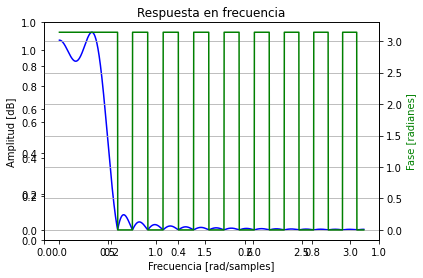

In [55]:
wii = np.arange (0,np.pi,0.001)
auxii = np.zeros (( len(wii),len(nii) ))

for i, k in enumerate (nii):
    auxii [:,i] = cii[i] * np.exp (1j*nii[i]*wi)


H2ii = np.sum (auxii,1)
mod_H2ii = np.abs (H2ii)
pha_H2ii = np.angle (H2ii)


#Gráfico
fig = plt.figure ()
plt.title ("Respuesta en frecuencia")
ax1 = fig.add_subplot (111)

plt.plot (wii,mod_H2ii,"b")
plt.ylabel ("Amplitud [dB]")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (wii,pha_H2ii,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

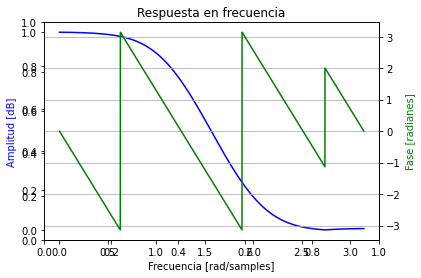

In [58]:
# iii )
wiii = np.arange (0,np.pi,0.001)
ciii = np.array ([0.0051, 0, -0.0419, 0, 0.2885, 0.4968, 0.2885, 0, -0.0419, 0, 0.0051])

w_2iii , H2iii = ss.freqz (ciii,1,wiii,plot=None) #parametros no recursivos,parametros recursivos (1 porque no tenemos), frecuencia

mod_H2iii = np.abs (H2iii)
pha_H2iii = np.angle (H2iii)


#Gráfico
fig = plt.figure ()
plt.title ("Respuesta en frecuencia")
ax1 = fig.add_subplot (111)

plt.plot (wiii,mod_H2iii,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (wiii,pha_H2iii,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()


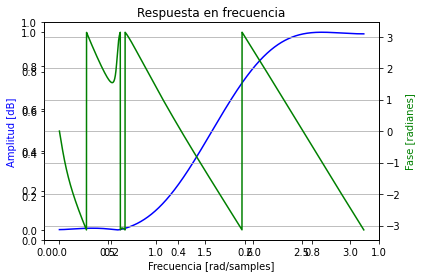

In [61]:
# iv)
wiv = np.arange (0,np.pi,0.001)
civ = np.array ( [-0.0051, 0, 0.0419, 0, -0.2885, 0.4968, -0.2885, 0, 0.0419, -0, 0.0051])

w_2iv , H2iv = ss.freqz (civ,1,wiv,plot=None) #parametros no recursivos,parametros recursivos (1 porque no tenemos), frecuencia

mod_H2iv = np.abs (H2iv)
pha_H2iv = np.angle (H2iv)



#Gráfico
fig = plt.figure ()
plt.title ("Respuesta en frecuencia")
ax1 = fig.add_subplot (111)

plt.plot (w_2iv,mod_H2iv,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_2iv,pha_H2iv,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

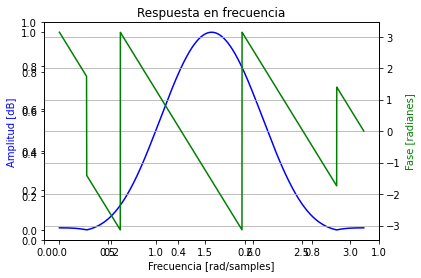

In [60]:
# v)
wv = np.arange (0,np.pi,0.001)
cv = np.array (  [0, 0.0591, 0, -0.2526, 0, 0.3765, 0, -0.2526, 0, 0.0591, 0] )

w_2v , H2v = ss.freqz (cv,1,wv,plot=None) #parametros no recursivos,parametros recursivos (1 porque no tenemos), frecuencia

mod_H2v = np.abs (H2v)
pha_H2v = np.angle (H2v)



#Gráfico
fig = plt.figure ()
plt.title ("Respuesta en frecuencia")
ax1 = fig.add_subplot (111)

plt.plot (w_2v,mod_H2v,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_2v,pha_H2v,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.13.14.png">

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.13.23.png">

### Apartado "A"

corresponde a un sistema recursivo

### Apartado "B"

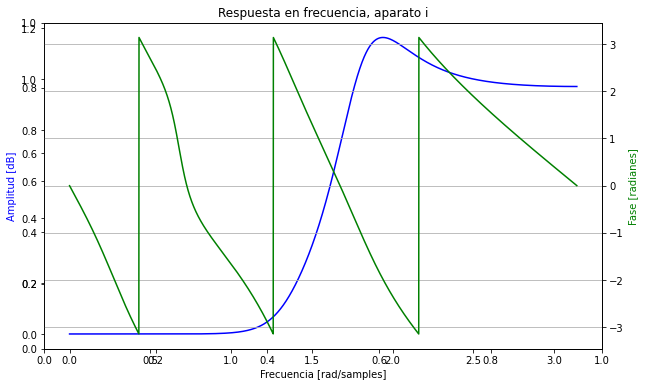

In [63]:
# i)
w3i = np.arange (0,np.pi,0.001)
a_3i = np.array ([1, 0, 1.201, 0, 0.485, 0, 0.0427, 0, 0.001, 0] ) #Recursivos
b_3i = np.array ([0.0052, -0.0466, 0.1865, -0.4353, 0.6529, -0.6529, 0.4353, -0.1865, 0.0466, -0.0051] ) #No recursivos

w_3i , H_3i = ss.freqz (b_3i,a_3i,w3i) #freqz (param No recursivos, param Recursivos, w, plot (opcional))

mod_H3i = np.abs (H_3i)
pha_H3i = np.angle (H_3i)



#Gráfico
fig = plt.figure (figsize = (10,6))
plt.title ("Respuesta en frecuencia, aparato i")
ax1 = fig.add_subplot (111)

plt.plot (w_3i,mod_H3i,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_3i,pha_H3i,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

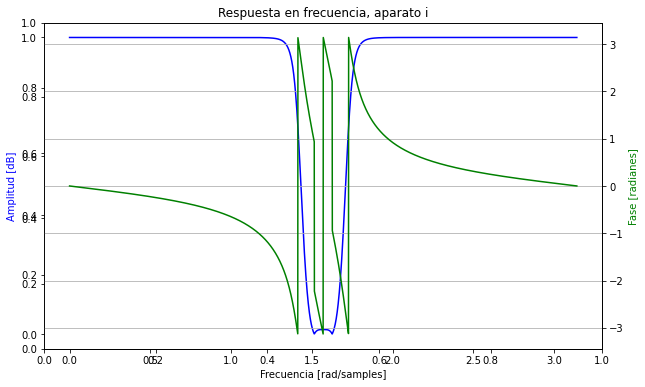

In [66]:
# ii)
w3ii = np.arange (0,np.pi,0.001)
a_3ii = np.array ([1, 0, 3.1806, 0, 3.8612, 0, 2.1122, 0, 0.4383] ) #Recursivos
b_3ii = np.array ([0.662, 0, 2.6481, 0, 3.9721, 0, 2.6481, 0, 0.6620] ) #No recursivos

w_3ii , H_3ii = ss.freqz (b_3ii,a_3ii,w3ii) #freqz (param No recursivos, param Recursivos, w, plot (opcional))

mod_H3ii = np.abs (H_3ii)
pha_H3ii = np.angle (H_3ii)



#Gráfico
fig = plt.figure (figsize = (10,6))
plt.title ("Respuesta en frecuencia, aparato i")
ax1 = fig.add_subplot (111)

plt.plot (w_3ii,mod_H3ii,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_3ii,pha_H3ii,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.16.32.png">

### Apartado "A"

### Apartado "B"

# y(n) = a y (n-1) + x (n)
# y (n) - a y (n-1) = x (n)

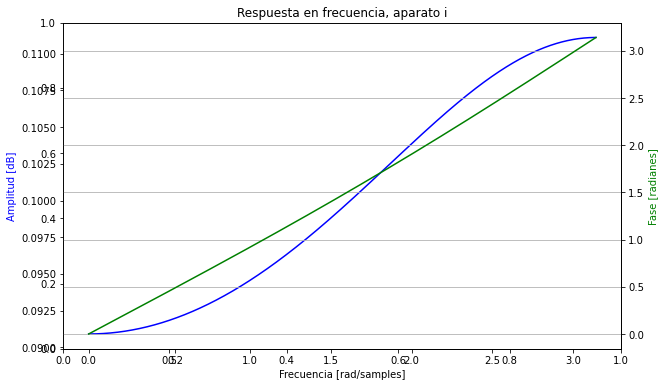

In [64]:
a4 = -10
b4 = 1 #Coeficientes recursivos

A4 = np.array ( [1, -a4] )
B4 = np.array ( [1,0] )

w4 = np.arange (0,np.pi,0.001)

w_4 , H_4 = ss.freqz (B4,A4,w4,plot=None)

mod_H4 = np.abs (H_4)
pha_H4 = np.angle (H_4)


fig = plt.figure (figsize = (10,6))
plt.title ("Respuesta en frecuencia, aparato i")
ax1 = fig.add_subplot (111)

plt.plot (w_4,mod_H4,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_4,pha_H4,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.16.43.png">

### Ejemplo para d=5 y T=1

# y (n) = x(n) + (-1/5 * x(n-5))
# y (n) = x(n)/5 + 0 * x(n-1) + 0 * x(n-2) + 0 * x(n-3) + 0 * x(n-4) + (-1/5 * x(n-5)) 

# Coeficientes B (No recursivos): [1/5,0,0,0,0,-1/5] o [1/(T*d),0,0,0,0,-1/(T*d)]

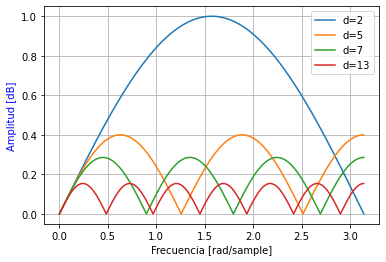

In [21]:
d5 = np.array ([2,5,7,13])
T5 = 1
w5 = np.arange (0,np.pi,0.001)

# B = [1/5,0,-1/5] para d=2
# B = [1/5,0,0,0,0,-1/5] para d= 5

for i in range (len(d5)):
    B5 = np.zeros ([d5[i]+1,1])
    B5[0] = 1/(d5[i]*T5)
    B5[-1] = -1/(d5[i]*T5)
    A5 = 1 #Por ser Sistema No Recursivo  
    w_5 , H_5 = ss.freqz (B5,A5,w5)
    plt.plot (w_5,abs (H_5))
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/sample]")
plt.legend (["d=2","d=5","d=7","d=13"])
plt.grid (True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-17 a la(s) 10.16.53.png">

# y(n) = 0.14 x(n-2) + 1.77 y(n-1) - 0.19 y(n-2) + 0.28 y(n-3)
# y(n) - 1.77 y(n-1) + 0.19 y(n-2) - 0.28 y(n-3) = 0.14 x(n-2)

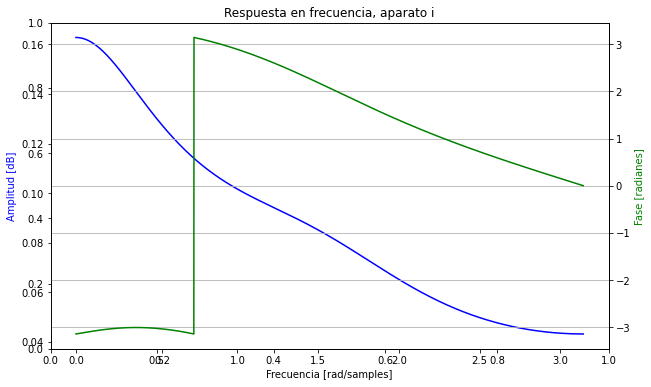

In [67]:
A6 = np.array ([1,-1.77,0.19,-0.28]) #Recursivos
B6 = np.array ([0,0,0.14,0]) #No recursivos
w6 = np.arange (0,np.pi,0.001)

w_6 , H_6 = ss.freqz (B6,A6,w6,plot=None)

mod_6 = np.abs (H_6)
pha_6 = np.angle (H_6)

fig = plt.figure (figsize = (10,6))
plt.title ("Respuesta en frecuencia, aparato i")
ax1 = fig.add_subplot (111)

plt.plot (w_6,mod_6,"b")
plt.ylabel ("Amplitud [dB]",color="b")
plt.xlabel ("Frecuencia [rad/samples]")

ax2 = ax1.twinx()
plt.plot (w_6,pha_6,"g")
plt.ylabel ("Fase [radianes]",color="g")
plt.grid (True)
plt.show()

In [68]:
H_IIR33 = IIRrespf (w6,B6,A6)

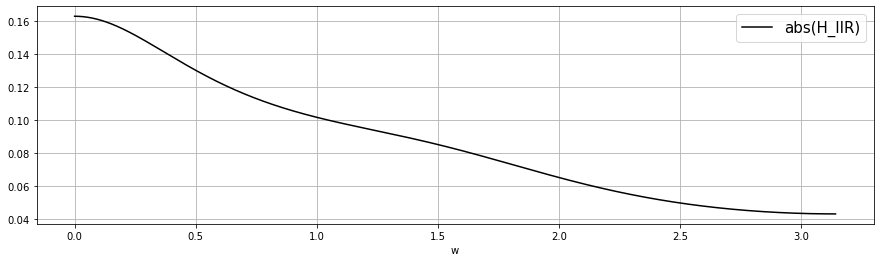

In [69]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR33[:,0],H_IIR33[:,1],label="abs(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()

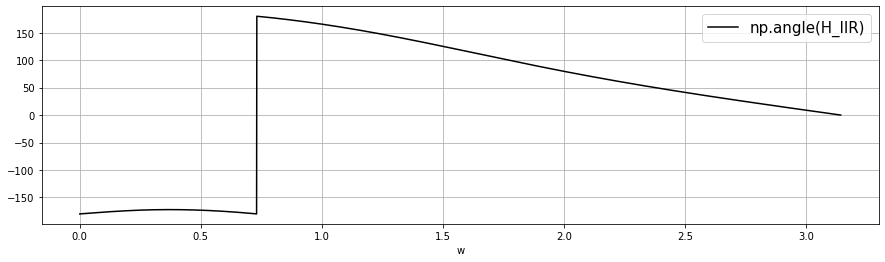

In [70]:
plt.figure (figsize=(15,4))
plt.plot (H_IIR33[:,0],H_IIR33[:,2]*180/np.pi,label="np.angle(H_IIR)",color="k")
plt.xlabel ("w")
plt.legend (fontsize = 15)
plt.grid (True)
plt.show ()